In [109]:
from keras.src.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.models import Sequential
import matplotlib.pyplot as plt
from keras.src.optimizers import Adam
from keras.src.callbacks import EarlyStopping
from skimage.measure import blur_effect

# Build Model

In [110]:
model = Sequential([
    Input(shape=(12, 28, 3)),                              # Correct: capital 'I'
    Conv2D(32, (3, 7), padding='same', activation='relu'),
    Conv2D(32, (3, 7), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(1, 2)),
    Conv2D(64, (3, 7), padding='same', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(31, activation='softmax')
])

In [111]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 12, 28, 32)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 28, 32)     │        21,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 12, 14, 64)     │        43,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 10752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │     1,376,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,447,039 (5.52 MB)

 Trainable params: 1,447,039 (5.52 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [114]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    rotation_range=5,
    brightness_range=(0.8, 1.2),
    zoom_range=0.1,
    channel_shift_range=0.1,
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    rotation_range=5,
    brightness_range=(0.8, 1.2),
    zoom_range=0.1,
    channel_shift_range=0.1,
)

train_dir = '/train_data_for_CNN/dataset_vietnam_licenses_plate_train_thresh'
test_dir = '/home/minhpn/Desktop/Green_Parking/Data/train_data_for_CNN/dataset_vietnam_license_plate_val_thresh'

# Load raw_image from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(12, 28),
    batch_size=8,
    class_mode='categorical',
    color_mode='rgb'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(12, 28),
    batch_size=8,
    class_mode='categorical',
    color_mode='rgb'
)

Found 3100 images belonging to 31 classes.
Found 620 images belonging to 31 classes.


In [115]:

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=500,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)


Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.0415 - loss: 3.4132 - val_accuracy: 0.0661 - val_loss: 3.3801
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1017 - loss: 3.3346
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.1383 - loss: 3.2829 - val_accuracy: 0.1565 - val_loss: 3.2213
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1110 - loss: 3.2394
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1677 - loss: 3.1539 - val_accuracy: 0.2210 - val_loss: 2.9061
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2799 - loss: 2.9327
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.2816 - loss: 2.5521 - val_accuracy: 0.3839 - val_loss: 2.3223
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4547 - loss: 2.1674
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5107 - loss: 1.8001 - val_accuracy: 0.4887 - val_loss: 1.8732
Epoch 10/500
10/10 

2025-07-11 15:55:09.173248: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8257 - loss: 0.5118 - val_accuracy: 0.8710 - val_loss: 0.4294
Epoch 52/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8923 - loss: 0.2953
Epoch 53/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8044 - loss: 0.8369 - val_accuracy: 0.8613 - val_loss: 0.4130
Epoch 54/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8710 - loss: 0.3958
Epoch 55/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8982 - loss: 0.3709 - val_accuracy: 0.8565 - val_loss: 0.4488
Epoch 56/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8510 - loss: 0.4056
Epoch 57/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8969 - loss: 0.4015 - val_accuracy: 0.8935 - val_loss: 0.3173
Epoch 58/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8466 - loss: 0.3128
Epoch 59/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7981 - loss: 0.4634 - val_accuracy: 0.8468 - val_loss: 0.3980
Epoch 60/500
10/10 ━━━━━

78/78 - 0s - 5ms/step - accuracy: 0.9290 - loss: 0.1976


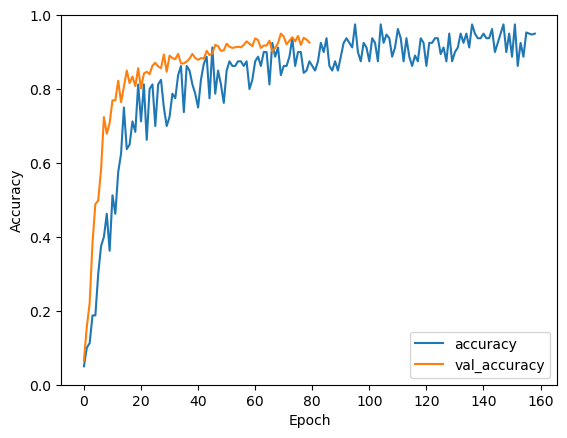

In [116]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

In [117]:
print(test_acc)

0.9290322661399841


In [118]:
model.save("CNN_Model.keras")